# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 11 - Mini-Projeto</font>

### Usando SVM Para Prever a Intenção de Compra de Usuários de E-Commerce

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versao da Linguagem Python usada neste Jupyter Notebook:', python_version())

Versao da Linguagem Python usada neste Jupyter Notebook: 3.7.6


Definição do Problema:

Neste Mini-Projeto, nosso trabalho será avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras.

Usaremos como fonte de dados o dataset:

Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' pode ser usado como o rótulo da classe.

## Importando os Pacotes

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm

# Iremos importar estes pacotes para termos a impressao das versoes na watermark
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Atualizacoes das versoes:
# sklearn de: 0.22.1 para 0.22.2
# numpy de: 1.18.1 para 1.18.2
# seaborn: ok
# matplotlib: de 3.1.3 para 3.2.1
# pandas: de 0.23.4 para 1.0.3

#!pip install scikit-learn==0.22.2 --user
#!pip install numpy==1.18.2 --user
#!pip install matplotlib==3.2.1 --user
#!pip install pandas==1.0.3 --user

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

seaborn   : 0.10.0
numpy     : 1.18.2
matplotlib: 3.2.1
sklearn   : 0.23.1
pandas    : 1.0.3



## Carga e Dicionário de Dados

In [2]:
# Carregando os dados
df_original = pd.read_csv('dados/online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Dicionário de Dados:

"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

## Análise Exploratória

In [4]:
# Shape
df_original.shape

(12330, 18)

In [5]:
# Tipos de Dados
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
# Verificando valores missing
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [3]:
# Removendo as linhas com valores missing
df_original.dropna(inplace = True)

In [4]:
# Verificando valores missing
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
# Shape
df_original.shape

(12316, 18)

In [6]:
# Verificando Valores Únicos
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Para fins de visualização, dividiremos os dados em variáveis contínuas e categóricas. Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas.

In [7]:
# Preparando os dados para o plot

# Cria uma cópia do dataset original
df = df_original.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [8]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [9]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [14]:
# Variáveis contínuas
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [15]:
# Variáveis categóricas
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


Gráficos para variáveis numéricas.

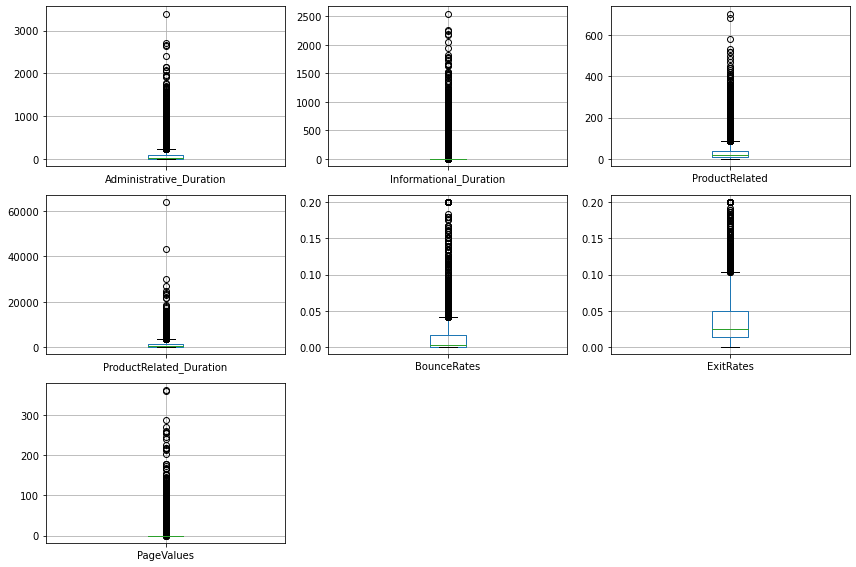

In [16]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1); # define linhas, colunas e sequenciamnento de plotagem
    df.boxplot(col);
    plt.tight_layout()
    
plt.savefig('imagens/boxplot1_DRGM.png')

Variáveis contínuas parecem extremamente distorcidas. Vamos aplicar transformação de log para melhor visualização.

In [10]:
# Transformação de log nas variáveis contínuas
df[continuous] = np.log(1 + df[continuous])

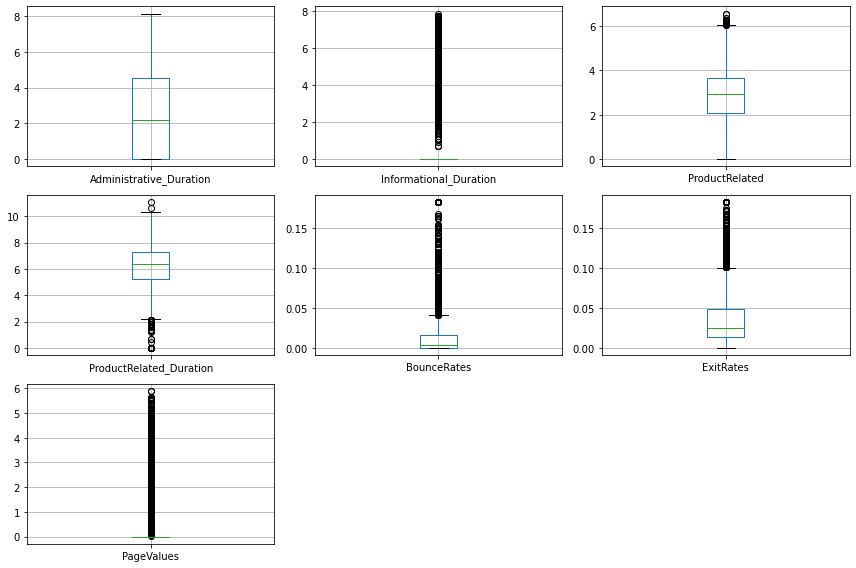

In [19]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12, 8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('imagens/boxplot2_DRGM.png')

Matriz de Correlação Entre Variáveis Contínuas.

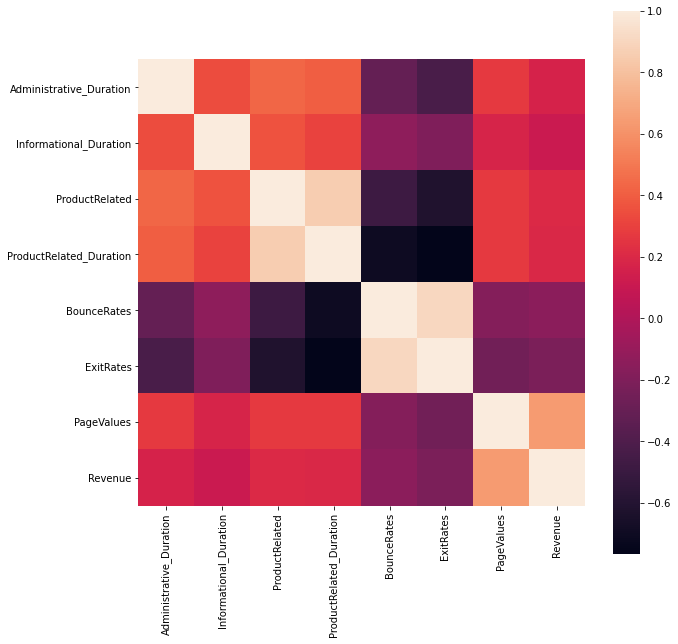

In [18]:
# Área de plotagem
plt.figure(figsize = (10, 10))

# Matriz de Correlação 
sns.heatmap(df[['Administrative_Duration',
               'Informational_Duration',
               'ProductRelated',
               'ProductRelated_Duration',
               'BounceRates',
               'ExitRates',
               'PageValues',
               'Revenue']].corr(), vmax = 1.0, square = True)

Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é influenciada por elas.

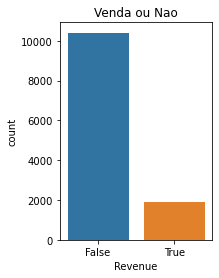

In [19]:
# Countplot Venda ou Não
plt.subplot(1,2,2)
plt.title('Venda ou Nao')
sns.countplot(df['Revenue'])

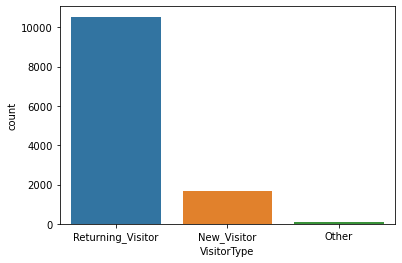

In [20]:
# Countplot Tipo de Visitante
plt.xlabel('Tipo de Visitante')
sns.countplot(df['VisitorType'])

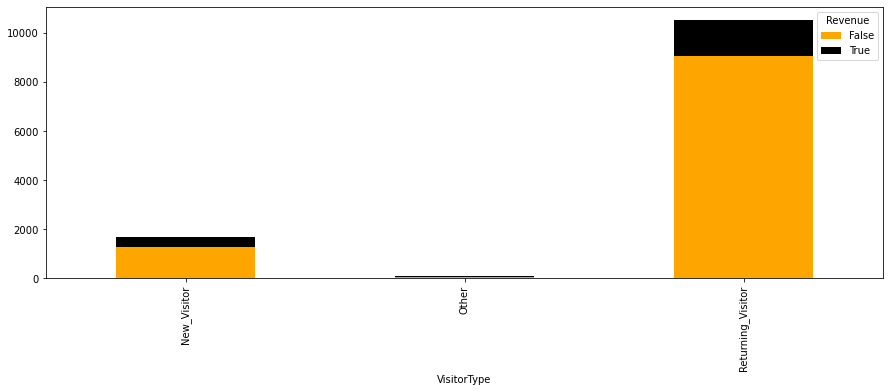

In [21]:
# Stacked Bar Tipo de Visitante x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (15, 5),
                                                   color = ['orange', 'black'])

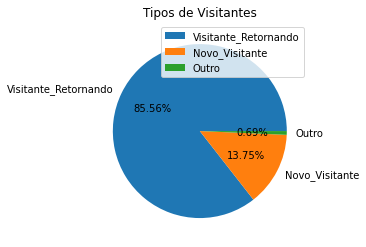

In [22]:
# Pie Chart Tipos de Visitantes
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()          

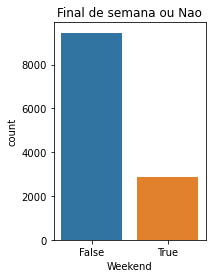

In [23]:
# Countplot Final de Semana ou Não
plt.subplot(1,2,1)
plt.title('Final de semana ou Nao')
sns.countplot(df['Weekend'])

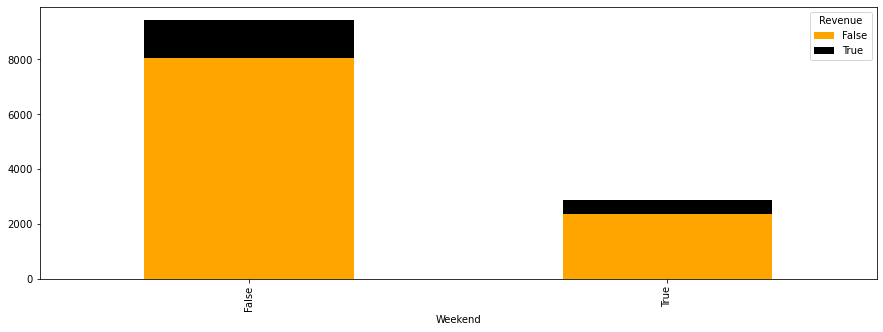

In [24]:
# Stacked Bar Final de Semana x Revenue
pd.crosstab(df['Weekend'], df["Revenue"]).plot(kind = 'bar',
                                              stacked = True,
                                              figsize = (15, 5),
                                              color = ['orange', 'black'])

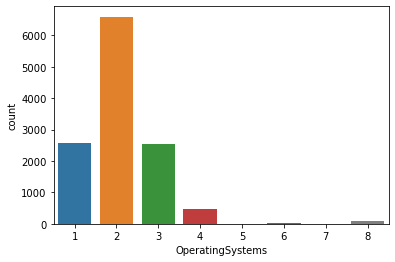

In [25]:
# Countplot Tipos de Sistemas Operacionais
#plt.figure(figsize = (15,6))
plt.figure('Tipos de Sistemas Operacionais')
plt.xlabel('Sistema Operacional Utilizado')
sns.countplot(df['OperatingSystems'])

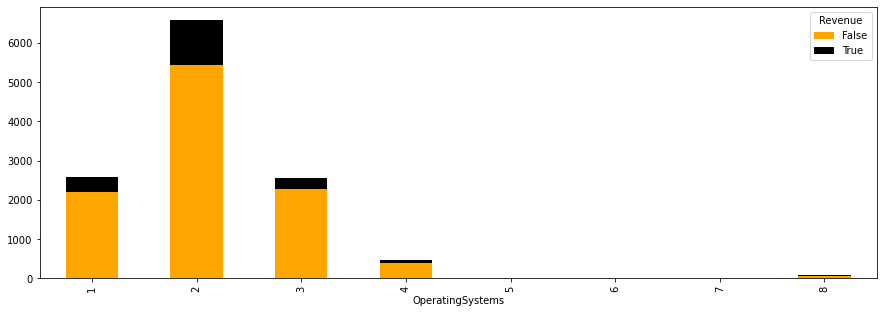

In [26]:
# Stacked Bar Tipo de SO x Revenue
pd.crosstab(df['OperatingSystems'], df["Revenue"]).plot(kind = 'bar',
                                              stacked = True,
                                              figsize = (15, 5),
                                              color = ['orange', 'black'])

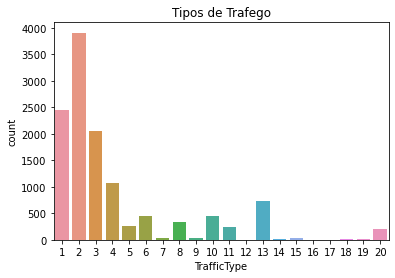

In [27]:
# Countplot Tipo de Tráfego
plt.title('Tipos de Trafego')
plt.xlabel('Tipo de Trafego')
sns.countplot(df['TrafficType'])

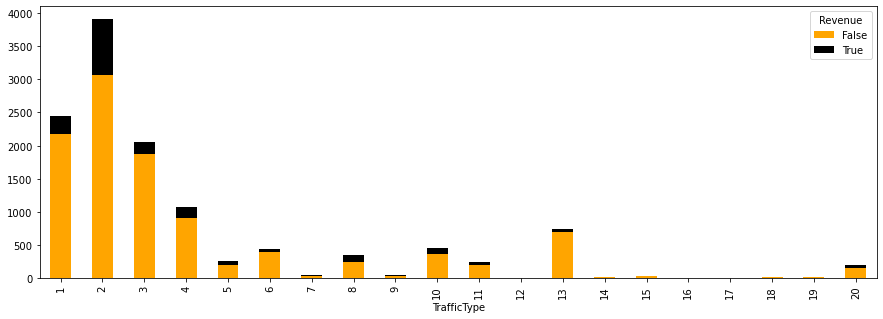

In [28]:
# Stacked Bar Tipos de Tráfego x Revenue
pd.crosstab(df['TrafficType'], df["Revenue"]).plot(kind = 'bar',
                                              stacked = True,
                                              figsize = (15, 5),
                                              color = ['orange', 'black'])

## Pré-Processamento dos Dados

In [11]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace = True)

In [31]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [32]:
# Shape
df_original.shape

(12316, 18)

In [13]:
# Verificando se a variável resposta está balanceada
target_count = df_original.Revenue.value_counts()
target_count

False    10408
True      1908
Name: Revenue, dtype: int64

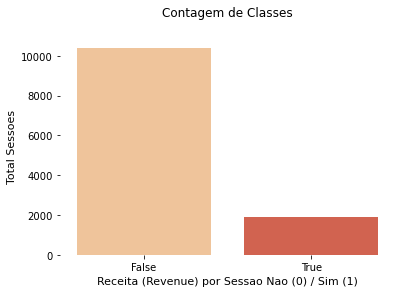

In [34]:
# Plot 
sns.countplot(df_original.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) por Sessao Nao (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessoes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [ ]:
# Ao aque parece o imblearn possui dependencias que geram erro na versao 0.22 do scikit-learn
# vamos fazer upgrade na verssao do scikit learn
# !pip install [-U] scikit-learn==0.23.1

In [35]:
# checando a versao do scikit learn
sklearn.__version__

'0.23.1'

In [14]:
# import imblearn
import imblearn
imblearn.__version__

'0.6.2'

In [15]:
# importando a funcao SMOTE para fazer oversampling
from imblearn.over_sampling import SMOTE

In [38]:
# Shape
df_original.shape

(12316, 18)

In [39]:
# Variáveis explicativas
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [40]:
# Variável Target
df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Balanceamento de Classe - Oversampling

In [16]:
# Importa a função
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

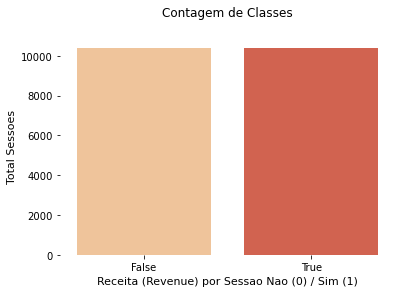

In [17]:
# Plot 
sns.countplot(y_res, palette="OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) por Sessao Nao (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessoes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [43]:
# Shape dos dados originais
df_original.shape

(12316, 18)

In [44]:
# Shape dos dados reamostrados (entradas)
X_res.shape

(20816, 17)

In [45]:
# Shape dos dados reamostrados (saida)
y_res.shape

(20816,)

In [18]:
# Ajustando X e y
X = X_res
y = y_res

In [19]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelo SVM

### Modelo Base com Kernel Linear

In [29]:
# Cria o modelo
modelo_v1 = svm.SVC(kernel = 'linear')

In [23]:
import time

In [30]:
# Treinamento
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print('Tempo de treinamento do modelo:', end - start)

Tempo de treinamento do modelo: 5865.979380130768


Modelo_v1 comecou treinamento as 17:46 hrs, dia 24/03

Modelo_v1 terminou treinamento as 19:17 hrs, dia 24/03

In [34]:
# Previsões
previsoes_v1 = modelo_v1.predict(X_teste)

In [35]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Modelo': 'SVM',
               'Versao': '1',
               'Kernel': 'Linear',
               'Precision': precision_score(previsoes_v1, y_teste),
               'Recall': recall_score(previsoes_v1, y_teste),
               'F1 Score': f1_score(previsoes_v1, y_teste),
               'Acuracia': accuracy_score(previsoes_v1, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v1)}

In [33]:
# Print
print('Metricas em Teste:\n')
SVM_dict_v1

Metricas em Teste:



{'Modelo': 'SVM',
 'Versao': '1',
 'Kernel': 'Linear',
 'Precision': 0.8694550063371356,
 'Recall': 0.7988355167394469,
 'F1 Score': 0.832650584129874,
 'Acuracia': 0.8233787029623699,
 'AUC': 0.8228790085101022}

### Modelo com Kernel Linear e Dados Padronizados (Scaled)

In [ ]:
# ***** Atenção *****
# O método nesta célula não deve ser usado, pois estaríamos aplicando o fit em teste e isso não é o ideal
# Aplicamos o fit somente nos dados de treino e aplicamos o transform nos dados de teste
# Padronização
# X_treino_scaled = StandardScaler().fit_transform(X_treino)
# X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [20]:
# Agora sim, a forma ideal de aplicar a padronização em treino e teste
# Padronização
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

In [21]:
X_treino_scaled

array([[ 0.67023596,  0.00746589, -0.4556655 , ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.71405441, -0.53155654, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [ 0.9117153 , -0.18078072, -0.4556655 , ...,  0.57746102,
         0.54253778,  1.44038165],
       ...,
       [-0.21784301,  0.00977669,  1.83111142, ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.50179946,
        -2.06175081, -0.69426044],
       [-0.37088559, -0.29288262,  0.58272764, ..., -0.50179946,
        -0.75960651, -0.69426044]])

In [22]:
X_teste_scaled

array([[-0.74974984, -0.52847418, -0.4556655 , ...,  0.57746102,
        -2.06175081,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       ...,
       [-0.80989566, -0.53903796, -0.4556655 , ...,  0.57746102,
         0.54253778, -0.69426044],
       [ 1.03373541,  1.74922518, -0.4556655 , ..., -0.50179946,
         0.54253778,  1.44038165],
       [ 0.3044991 , -0.28747987,  1.09682136, ..., -0.50179946,
         0.54253778, -0.69426044]])

Obsevação:

Para impedir que as informações sobre a distribuição do conjunto de teste vazem em seu modelo, o ideal é aplicar a padronização em separado nos dados de treino e de teste, ajustando o redimensionador apenas aos dados de treinamento, padronizando então os conjuntos de treinamento e teste com esse redimensionador (exatamente como está na célula acima). Ao ajustar o redimensionador no conjunto de dados completo antes da divisão em treino e teste, informações sobre o conjunto de testes são usadas para transformar o conjunto de treinamento.

Conhecer a distribuição de todo o conjunto de dados pode influenciar como você detecta e processa outliers, bem como como você parametriza seu modelo. Embora os dados em si não sejam expostos, há informações sobre a distribuição dos dados. Como resultado, o desempenho do seu conjunto de testes não é uma estimativa real do desempenho em dados invisíveis.

Sempre aplique a padronização depois de fazer a divisão em treino e teste, exatamente como fizemos aqui. Usamos fit_transform() nos dados de treino e transform() nos dados de teste quando usamos o StandardScaler().

In [36]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = 'linear')

In [37]:
# Treinamento
start = time.time()
modelo_v2.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 8.918365001678467


In [38]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [39]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo': 'SVM',
               'Versao': '2',
               'Kernel': 'Linear com Dados Padronizados',
               'Precision': precision_score(previsoes_v2, y_teste),
               'Recall': recall_score(previsoes_v2, y_teste),
               'F1 Score': f1_score(previsoes_v2, y_teste),
               'Acuracia': accuracy_score(previsoes_v2, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v2)}

In [40]:
# Print
print('Metricas em Teste:\n')
SVM_dict_v2

Metricas em Teste:



{'Modelo': 'SVM',
 'Versao': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.7896070975918885,
 'Recall': 0.8909545942080801,
 'F1 Score': 0.8372249286074249,
 'Acuracia': 0.844835868694956,
 'AUC': 0.8454348210523379}

### Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [41]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range =  np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f'Acuracia em Treinamento: {modelo_v3_grid_search_rbf.best_score_:.2%}')
print('')
print(f'Hiperparametros Ideais: {modelo_v3_grid_search_rbf.best_params_}')

Tempo de Treinamento do Modelo com Grid Search: 102.5135588645935
Acuracia em Treinamento: 87.41%

Hiperparametros Ideais: {'C': 200.0, 'gamma': 0.003}


In [42]:
# Previsões
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [43]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {'Modelo': 'SVM',
               'Versao': '3',
               'Kernel': 'RBF com Dados Padronizados',
               'Precision': precision_score(previsoes_v3, y_teste),
               'Recall': recall_score(previsoes_v3, y_teste),
               'F1 Score': f1_score(previsoes_v3, y_teste),
               'Acuracia': accuracy_score(previsoes_v3, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v3)}

In [44]:
# Print
print('Metricas em Teste:\n')
SVM_dict_v3

Metricas em Teste:



{'Modelo': 'SVM',
 'Versao': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.8361850443599493,
 'Recall': 0.8957909029192125,
 'F1 Score': 0.8649623074401837,
 'Acuracia': 0.8680544435548438,
 'AUC': 0.8684000650741152}

### Otimização de Hiperparâmetros com Grid Search e Kernel Polinomial

In [24]:
# Cria o modelo
modelo_v4 = svm.SVC(kernel = 'poly')

# Valores para o grid
r_range = np.array([0.5, 1.0])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2, 3, 4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento
modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f'Acuracia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}')
print('')
print(f'Hiperparametros Ideais: {modelo_v4_grid_search_poly.best_params_}')

Tempo de Treinamento do Modelo com Grid Search: 96.75889158248901
Acuracia em Treinamento: 86.14%

Hiperparametros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [26]:
# Previsões
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [27]:
# Dicionário de métricas e metadados
SVM_dict_v4 = {'Modelo': 'SVM',
               'Versao': '4',
               'Kernel': 'Polinomial com Dados Padronizados',
               'Precision': precision_score(previsoes_v4, y_teste),
               'Recall': recall_score(previsoes_v4, y_teste),
               'F1 Score': f1_score(previsoes_v4, y_teste),
               'Acuracia': accuracy_score(previsoes_v4, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v4)}

In [28]:
# Print
print('Metricas em Teste:\n')
SVM_dict_v4

Metricas em Teste:



{'Modelo': 'SVM',
 'Versao': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.811787072243346,
 'Recall': 0.8902015288394719,
 'F1 Score': 0.8491879350348028,
 'Acuracia': 0.8542834267413931,
 'AUC': 0.8547442968856743}

In [47]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({'SVM_dict_v1': pd.Series(SVM_dict_v1),
                       'SVM_dict_v2': pd.Series(SVM_dict_v2),
                       'SVM_dict_v3': pd.Series(SVM_dict_v3),
                       'SVM_dict_v4': pd.Series(SVM_dict_v4)})

In [48]:
# Print
resumo

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3,SVM_dict_v4
Modelo,SVM,SVM,SVM,SVM
Versao,1,2,3,4
Kernel,Linear,Linear com Dados Padronizados,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.869455,0.789607,0.836185,0.811787
Recall,0.798836,0.890955,0.895791,0.890202
F1 Score,0.832651,0.837225,0.864962,0.849188
Acuracia,0.823379,0.844836,0.868054,0.854283
AUC,0.822879,0.845435,0.8684,0.854744


### Fazendo Previsões com o Modelo Treinado

In [49]:
# Novo registro
novo_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, False]).reshape(1, -1)

In [50]:
# Padronizando o registro
novo_x_scaled = StandardScaler().fit_transform(novo_x)

In [51]:
# Previsão
previsao_novo_x = modelo_v3_grid_search_rbf.predict(novo_x_scaled)

In [52]:
previsao_novo_x

array([ True])

# Fim